# Dataframe Manipulation Warmup

In [1]:
import numpy as np
import pandas as pd

np.random.seed(406)

n = 5000
df = pd.DataFrame({
    'favorite_animal': np.random.choice(['cat', 'dog', 'frog', 'lemur', 'panda'], n),
    'favorite_vegetable': np.random.choice(['brussel sprouts', 'potato', 'squash'], n),
    'favorite_fruit': np.random.choice(['banana', 'apple', 'blueberries'], n),
    'wears_glasses': np.random.choice(['yes', 'no'], n),
    'netflix_consumption': np.random.normal(10, 2, n),
    'open_browser_tabs': np.random.randint(2, 90, n),
})

1. What is the highest amount of netflix consumption? `17.535`
2. How many people wear glasses? What percentage of people is this? `2555`, `.511`
3. How many people's favorite animal is a dog? `1002`
4. What is the most common favorite animal? `lemur`
5. What is the average netflix consumption for people that prefer brussel sprouts? `10.008`
6. What is the most common favorite fruit for people who wear glasses and have more than 40 open browser tabs? `blueberries`

In [4]:
round(df['netflix_consumption'].max(),3)

17.535

In [24]:
print(f"{df['wears_glasses'].value_counts()}")
yes = (df['wears_glasses'] == 'yes').sum()
no = (df['wears_glasses'] == 'no').sum()
print(f' the percentage of people that wear glasses = {yes / (yes + no)}')

yes    2555
no     2445
Name: wears_glasses, dtype: int64
 the percentage of people that wear glasses = 0.511


In [42]:
(df.wears_glasses == 'yes').sum(), (df.wears_glasses == 'yes').mean()

(2555, 0.511)

In [26]:
dog = (df['favorite_animal'] == 'dog').sum()
dog

1002

In [5]:
(df['favorite_animal'] == 'dog').sum()

1002

In [43]:
#df['favorite_animal'].value_counts().max()
df['favorite_animal'].value_counts()

lemur    1028
frog     1015
dog      1002
cat       980
panda     975
Name: favorite_animal, dtype: int64

In [45]:
df[df.favorite_vegetable == 'brussel sprouts'].netflix_consumption.mean()

10.00847154798366

In [49]:
subset = df[df.wears_glasses == 'yes']
subset = subset[subset.open_browser_tabs > 40]
subset.favorite_fruit.value_counts()

blueberries    498
apple          477
banana         472
Name: favorite_fruit, dtype: int64

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')

In [8]:
df.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3


In [11]:
# How many breeds have an energy level of 5? 
# How many different coat types are there? 
(df['Energy Level'] == 5).sum()
df['Coat Type'].nunique()

10

In [12]:
# What is the average drooling level of breeds with a long coat length? 
df.loc[df['Coat Length'] == 'Long', 'Drooling Level'].mean()

1.4827586206896552

In [14]:
# What is the barking level of Anatolian Shepherd Dogs?
df[df.Breed.str.startswith('Anatolian')].Breed.iloc[0]
df.loc[df.Breed.str.startswith('Anatolian'), ['Breed', 'Barking Level']]

,Breed,Barking Level
84,Anatolian Shepherd Dogs,3


In [16]:
# How many breeds have a smooth coat type, a short coat, length, and a playfulness level of 3?
subset = df[df['Coat Type'] == 'Smooth'].copy()
subset = subset[subset['Coat Length'] == 'Short']
subset = subset[subset['Playfulness Level'] == 3]
subset.shape

(27, 17)

In [17]:
# What percentage of breeds fall into each value of adaptability level? Make a visualization like the one below showing this
import matplotlib.pyplot as plt

shedding_levels = df['Shedding Level'].value_counts().sort_index()
shedding_levels / shedding_levels.sum()

0    0.005128
1    0.138462
2    0.210256
3    0.558974
4    0.082051
5    0.005128
Name: Shedding Level, dtype: float64

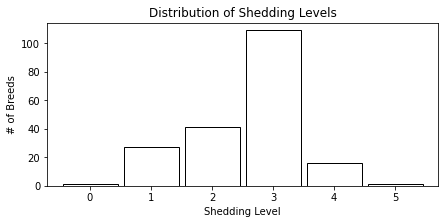

In [18]:
shedding_levels.plot.bar(
    width=.9,
    ec='black',
    fc='white',
    figsize=(7, 3),
    title='Distribution of Shedding Levels',
    ylabel='# of Breeds',
    xlabel='Shedding Level',
)
plt.xticks(rotation=0)
plt.show()

In [19]:
url = 'https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-03-22/babynames.csv'
df = pd.read_csv(url)
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


In [25]:
# What were the 10 most popular names the year you were born?
# What year was your name the most popular?
# Where does your name rank for the year that you were born?
# Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
# Visualize your name's popularity over time.

df[df['year'] == 1993].sort_values(by='n',ascending=False).head(10)

,year,sex,name,n,prop
1160653,1993,M,Michael,49550,0.023996
1160654,1993,M,Christopher,38228,0.018513
1160655,1993,M,Matthew,35769,0.017322
1144856,1993,F,Jessica,34988,0.017750
1144857,1993,F,Ashley,34850,0.017680
1160656,1993,M,Joshua,33578,0.016261
1160657,1993,M,Tyler,29796,0.014429
1160658,1993,M,Brandon,28732,0.013914
1160659,1993,M,Daniel,28682,0.013890
1160660,1993,M,Nicholas,28105,0.013610


In [28]:
df[df['name'] == 'Nicholas'].sort_values(by='n', ascending=False).head(1)

,year,sex,name,n,prop
1212575,1995,M,Nicholas,29155,0.014498


In [29]:
df[df['name'] == 'Nicholas'].sort_values(by='year')

,year,sex,name,n,prop
1119,1880,M,Nicholas,73,0.000617
3141,1881,M,Nicholas,56,0.000517
5158,1882,M,Nicholas,66,0.000541
7290,1883,M,Nicholas,71,0.000631
9511,1884,M,Nicholas,69,0.000562
...,...,...,...,...,...
1845254,2015,M,Nicholas,6238,0.003060
1874869,2016,F,Nicholas,6,0.000003
1878096,2016,M,Nicholas,5738,0.002844
1907505,2017,F,Nicholas,6,0.000003
